# Gold Price Prediction

# Import Libraries

In [142]:
import pandas as pd
import numpy as np

In [143]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Task 1: Initial Data Exploration

In [144]:
gold_data = pd.read_csv("gold_price.csv")

In [145]:
gold_data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [146]:
gold_data.isnull().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [147]:
gold_data.dropna(inplace=True)

In [148]:
gold_data.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

# Task 2: Create Train & Test Sets

In [149]:
gold_data = gold_data.drop(['Date', 'GBP (AM)'], axis =1)

In [150]:
df = pd.DataFrame(gold_data)

In [151]:
df

,USD (AM),USD (PM),GBP (PM),EURO (AM),EURO (PM)
0,272.80,271.10,181.617,288.677,287.334
1,269.00,267.15,177.390,281.823,281.655
2,268.75,267.10,178.352,282.538,282.049
3,268.00,267.40,178.148,280.775,280.882
4,268.60,268.30,178.664,282.410,282.481
...,...,...,...,...,...
4713,1531.85,1532.95,1247.510,1378.970,1380.880
4714,1541.75,1537.15,1258.770,1389.890,1387.430
4715,1536.65,1540.20,1262.960,1387.290,1392.030
4716,1526.55,1528.40,1251.150,1382.750,1383.510


In [152]:
df.pct_change(axis = 'columns', periods = 1)

,USD (AM),USD (PM),GBP (PM),EURO (AM),EURO (PM)
0,NaN,-0.006232,-0.330074,0.589482,-0.004652
1,NaN,-0.006877,-0.335991,0.588720,-0.000596
2,NaN,-0.006140,-0.332265,0.584159,-0.001731
3,NaN,-0.002239,-0.333777,0.576077,0.000381
4,NaN,-0.001117,-0.334089,0.580677,0.000251
...,...,...,...,...,...
4713,NaN,0.000718,-0.186203,0.105378,0.001385
4714,NaN,-0.002984,-0.181101,0.104165,-0.001770
4715,NaN,0.002310,-0.180003,0.098443,0.003417
4716,NaN,0.001212,-0.181399,0.105183,0.000550


In [153]:
df['new_column'] = df['USD (PM)']*100

In [154]:
df

,USD (AM),USD (PM),GBP (PM),EURO (AM),EURO (PM),new_column
0,272.80,271.10,181.617,288.677,287.334,27110.0
1,269.00,267.15,177.390,281.823,281.655,26715.0
2,268.75,267.10,178.352,282.538,282.049,26710.0
3,268.00,267.40,178.148,280.775,280.882,26740.0
4,268.60,268.30,178.664,282.410,282.481,26830.0
...,...,...,...,...,...,...
4713,1531.85,1532.95,1247.510,1378.970,1380.880,153295.0
4714,1541.75,1537.15,1258.770,1389.890,1387.430,153715.0
4715,1536.65,1540.20,1262.960,1387.290,1392.030,154020.0
4716,1526.55,1528.40,1251.150,1382.750,1383.510,152840.0


In [155]:
x = gold_data.drop(['new_column'],axis=1)
y = gold_data['new_column']

In [156]:
x

,USD (AM),USD (PM),GBP (PM),EURO (AM),EURO (PM)
0,272.80,271.10,181.617,288.677,287.334
1,269.00,267.15,177.390,281.823,281.655
2,268.75,267.10,178.352,282.538,282.049
3,268.00,267.40,178.148,280.775,280.882
4,268.60,268.30,178.664,282.410,282.481
...,...,...,...,...,...
4713,1531.85,1532.95,1247.510,1378.970,1380.880
4714,1541.75,1537.15,1258.770,1389.890,1387.430
4715,1536.65,1540.20,1262.960,1387.290,1392.030
4716,1526.55,1528.40,1251.150,1382.750,1383.510


In [157]:
y

0        27110.0
1        26715.0
2        26710.0
3        26740.0
4        26830.0
          ...   
4713    153295.0
4714    153715.0
4715    154020.0
4716    152840.0
4717    152595.0
Name: new_column, Length: 4682, dtype: float64

In [158]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size =0.2, random_state =2)

# Task 3: Develop Models & Predictions

In [159]:
regressor = RandomForestRegressor(n_estimators = 100)

In [160]:
regressor.fit(x_train , y_train)

RandomForestRegressor()

In [161]:
test_data_prediction = regressor.predict(x_test)

In [162]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9999983422199321


In [163]:
y_test = list(y_test)

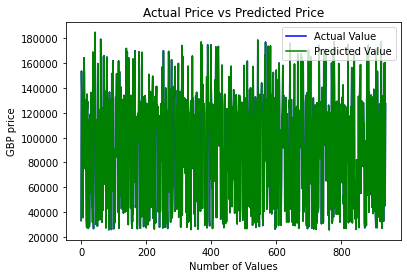

In [164]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color= 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GBP price')
plt.legend()
plt.show()